#Feature Columns



* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the * nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbor



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Simple Linear Regression

In [2]:
dataset=pd.read_csv("/content/kc_house_data.csv")
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
space=dataset['sqft_living']
price=dataset['price']

In [4]:
#convert space,price to arrays
x = np.array(space).reshape(-1, 1)
y = np.array(price)

Splitting the data into Train and Test

In [5]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.2, random_state=0)

linear regression

In [6]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

Predicting the prices

In [7]:
pred = regressor.predict(xtest)
pred

array([ 357817.97314081, 1277876.09832343,  360657.65871236, ...,
        337940.17413995,  221513.06570635,  417451.37014338])

Visualizing the training Test Results 

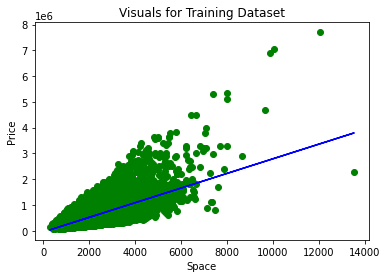

In [8]:
plt.scatter(xtrain, ytrain, color= 'green')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

Visualizing the Test Results

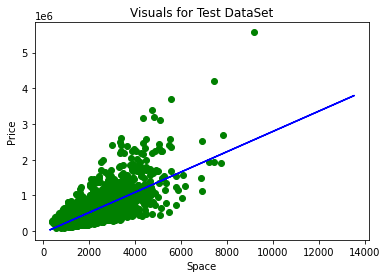

In [9]:
plt.scatter(xtest, ytest, color= 'green')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

In [10]:
print (regressor.predict([[1220]]))

[298184.57613823]


features

In [11]:
fet=[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long']
x_fet=dataset[fet]
y_tar=dataset['price']

splitting data

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(x_fet, y_tar, test_size = 0.3, random_state = 5)

training the model by using LinearRegression

In [13]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [14]:
accuracy=model.score(X_test,Y_test)

"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 70%'

#Ridge

In [15]:
from sklearn.linear_model import Ridge as rd
model1=rd(alpha=0.0001)

In [16]:
model1.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.94671e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=0.0001)

In [17]:
accuracy1=model.score(X_test,Y_test)

"Accuracy1: {}%".format(int(round(accuracy1 * 100)))

'Accuracy1: 70%'

#Random forrest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()

In [19]:
model2.fit(X_train,Y_train)

RandomForestRegressor()

In [20]:
accuracy2=model2.score(X_test,Y_test)

"Accuracy2: {}%".format(int(round(accuracy2 * 100)))

'Accuracy2: 88%'

#Elasticnet

In [21]:
from sklearn.linear_model import ElasticNet
model3=ElasticNet()


In [22]:
model3.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.157e+14, tolerance: 2.014e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


ElasticNet()

In [23]:
accuracy3=model3.score(X_test,Y_test)

"Accuracy3: {}%".format(int(round(accuracy3 * 100)))


'Accuracy3: 62%'

Desion Tree 

In [24]:
from sklearn.tree import DecisionTreeRegressor
model4=DecisionTreeRegressor()

In [25]:
model4.fit(X_train,Y_train)

DecisionTreeRegressor()

In [26]:
accuracy4=model4.score(X_test,Y_test)
"Accuracy4: {}%".format(int(round(accuracy4 * 100)))

'Accuracy4: 76%'

#KNN

In [27]:
from sklearn.neighbors import KNeighborsRegressor
model5=KNeighborsRegressor()

In [ ]:
model5.fit(X_train,Y_train)

In [29]:
accuracy5=model5.score(X_test,Y_test)
"Accuracy5: {}%".format(int(round(accuracy5 * 100)))

'Accuracy5: 52%'

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
model6=GradientBoostingClassifier()


In [ ]:
model6.fit(X_train,Y_train)

In [ ]:
accuracy6=model6.score(X_test,Y_test)
"Accuracy5: {}%".format(int(round(accuracy6 * 100)))